# Text-preprocessing

## M1: CountVectorizer

In [3]:
def preprocess_with_count_vectorizer(feature, train_df, test_df, ngram=1):
    train_corpus = train_df[feature]
    test = test_df[feature]
    
    vocab = CountVectorizer(preprocessor=preprocess, min_df=2, max_df=len(train_df), ngram_range=(ngram,ngram)).fit(train_corpus)
    x_train = vocab.transform(train_corpus)
    x_test = vocab.transform(test)
    
    scipy.sparse.save_npz(f'./preprocessed_data/CountVectorizer/train_{feature}_{ngram}grams_countVectorizer.npz', x_train)
    scipy.sparse.save_npz(f'./preprocessed_data/CountVectorizer/test_{feature}_{ngram}grams_countVectorizer.npz', x_test)
    
    return x_train, x_test

In [4]:
#vocab_dict = vocab.vocabulary_

## M2: doc2Vec

In [5]:
import gensim
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

In [6]:
# size of the output vector
vec_size = 100

# function to preprocess and tokenize text
def tokenize_corpus(txt, tokens_only=False, ngram=1):
    for i, line in enumerate(txt):
        line_processed = preprocess(line)
        if ngram == 1:
            tokens = line_processed.split()
        else:
            tokens = list(ngrams(line_processed.split(), n=ngram))
            tokens = [' '.join(token) for token in tokens]
        # tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [7]:
def preprocess_with_doc2vec(feature, train_df, test_df, ngram=1):
    train_corpus = train_df[feature]
    test = test_df[feature]
    # tokenize a training corpus
    corpus = list(tokenize_corpus(train_corpus))
    
    # train doc2vec on the training corpus
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vec_size, min_count=2, epochs=40)
    model.build_vocab(corpus)
    model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

    # tokenize new documents
    doc_train = list(tokenize_corpus(train_corpus, tokens_only=True, ngram=ngram))
    doc_test = list(tokenize_corpus(test, tokens_only=True, ngram=ngram))
    
    # generate embeddings for the new documents in training set
    x_train = np.zeros((len(doc_train),vec_size))
    for i in range(len(doc_train)):
        x_train[i,:] = model.infer_vector(doc_train[i])

    # generate embeddings for the new documents in test set
    x_test = np.zeros((len(doc_test),vec_size))  # type = numpy.ndarray
    for i in range(len(doc_test)):
        x_test[i,:] = model.infer_vector(doc_test[i])

    # print(x_test)
    # check the shape of doc_emb
    # print(x_train.shape)
    np.savetxt(f'./preprocessed_data/doc2Vec/train_{feature}_{ngram}grams_doc2vec.csv', x_train, delimiter=',')
    np.savetxt(f'./preprocessed_data/doc2Vec/test_{feature}_{ngram}grams_doc2vec.csv', x_test, delimiter=',')
    
    return x_train, x_test

## M3: TfIdf

In [4]:
def preprocess_with_tfidf_vectorizer(feature, train_df, test_df, ngram=1):
    train_corpus = train_df[feature]
    test = test_df[feature]
    
    vocab = TfidfVectorizer(preprocessor=preprocess, min_df=2, max_df=len(train_df), ngram_range=(ngram,ngram), max_features=300).fit(train_corpus)
    x_train = vocab.transform(train_corpus)
    x_test = vocab.transform(test)
    
    scipy.sparse.save_npz(f'./preprocessed_data/TfIdf/train_{feature}_{ngram}grams_tfidf.npz', x_train)
    scipy.sparse.save_npz(f'./preprocessed_data/TfIdf/test_{feature}_{ngram}grams_tfidf.npz', x_test)
    
    return x_train, x_test, vocab.vocabulary_

# Main

## M1: CountVectorizer
```python
# Check
preprocess(train_df['Description'][0])

# Process data
preprocess_with_count_vectorizer('Name', train_df, test_df, ngram=1)
preprocess_with_count_vectorizer('Description', train_df, test_df, ngram=2)
preprocess_with_count_vectorizer('Name', train_df, test_df, ngram=2)
preprocess_with_count_vectorizer('Description', train_df, test_df, ngram=1)
```

## M2: doc2Vec
```python
# Check
list(tokenize_corpus(train_df['Name'], ngram=1))

# Process data
preprocess_with_doc2vec('Name', train_df, test_df, ngram=1)
preprocess_with_doc2vec('Description', train_df, test_df, ngram=2)
preprocess_with_doc2vec('Name', train_df, test_df, ngram=2)
preprocess_with_doc2vec('Description', train_df, test_df, ngram=1)
```

## M3: TfIdfVectorizer
```python
# TfidfVectorizer using the same preprocess() function as CountVectorizer
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=1)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=1)
```

In [ ]:
## M3: TfIdfVectorizer
```python
# TfidfVectorizer using the same preprocess() function as CountVectorizer
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=1)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=1)
```

# Standardization

In [ ]:
# Standardise page number
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import normalize

scaler = MinMaxScaler()
x_full_train['pagesNumber'] = scaler.fit_transform(x_full_train['pagesNumber'].values.reshape(-1, 1))

# Check if imputation is needed for missing values (no)
print(f"The pagesNumber column has {x_full_train['pagesNumber'].isna().sum()} missing values.")
print(f"The pagesNumber column has {(x_full_train['pagesNumber'] == np.inf).sum()} infinite values.")
print(f"The pagesNumber column has {(x_full_train['pagesNumber'] == 0).sum()} zero values.")  # 196 zero values

# Take the log
x_full_train['pagesNumber'] = np.log(1 + x_full_train['pagesNumber'])  # prevent zero devision
print(x_full_train['pagesNumber'][:20])

print(np.mean(x_full_train['pagesNumber']))
print(np.std(x_full_train['pagesNumber']))
print(np.min(x_full_train['pagesNumber']))
print(np.max(x_full_train['pagesNumber']))

## OHE for Authors & Publisher

In [ ]:
def preprocess_string_feature(df, feature, ohe=None):
    # first preprocess the strings
    df[feature] = df[feature].apply(lambda x: preprocess(str(x), stop_words_removal=False, lemmatize=False, min_word_len=0))
    
    if ohe is None:
        ohe = OneHotEncoder(handle_unknown='ignore')
        ohe.fit(df[[feature]])
    
    transformed_col = ohe.transform(df[[feature]])  # a sparse matrix
    transformed_df = pd.DataFrame.sparse.from_spmatrix(transformed_col).set_axis(ohe.categories_[0], axis=1, inplace=False)
    
    return transformed_df, ohe

train_df_author, ohe_author = preprocess_string_feature(train_df, 'Authors')
train_df_publisher, ohe_publisher = preprocess_string_feature(train_df, 'Publisher')
train_df = pd.concat([train_df, train_df_author, train_df_publisher], axis=1)
train_df = train_df.drop(STRING_FEATURES, axis=1)  # drop the original features
train_df

sorted(ohe_author.categories_[0])

In [10]:
train_df_author, ohe_author = preprocess_string_feature(train_df, 'Authors')
train_df_publisher, ohe_publisher = preprocess_string_feature(train_df, 'Publisher')
train_df = pd.concat([train_df, train_df_author, train_df_publisher], axis=1)
train_df = train_df.drop(STRING_FEATURES, axis=1)  # drop the original features
train_df

,Name,PublishYear,PublishMonth,PublishDay,pagesNumber,Description,rating_label,,aaron bank,aaron beck,...,zero three,zoland books,zonderkidz,zondervan,zondervan academic,zondervan publishing company,zone books,zsolnay,zubaan books penguin india,zzdap publishing
0,Best of Dr Jean: Reading & Writing,2005,6,1,48,Teachers will turn to this treasury of ideas a...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Here All Dwell Free,1991,10,1,364,Every human being lives a fairy tale -- an unc...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Boomer's Big Surprise,2005,3,31,32,<i>Boomer's Big Surprise</i> will have special...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"I'll Go and Do More: Annie Dodge Wauneka, Nava...",2004,9,1,293,<i>I'll Go and Do More</i> is the story of Ann...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Us,2005,7,7,352,"Since their days at Oxford, they've gone their...",3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,Black Coffee Blues,1997,8,1,120,"""If I lose the light of the sun, I will write ...",4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,America's Champion Swimmer: Gertrude Ederle,2005,6,1,32,"Trudy Ederle loved to swim, and she was determ...",4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,Crime and Custom in Savage Society,1989,2,15,132,Bronislaw Malinowski achieved international re...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,The Name and Nature of Poetry and Other Select...,1998,4,21,136,Lovers of Housman's poetry and admirers of his...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sorted(ohe_author.categories_[0])

['',
 'aaron bank',
 'aaron beck',
 'aaron hamburger',
 'aaron hass',
 'aaron kramer',
 'aaron latham',
 'aaron mccollough',
 'aaron reynolds',
 'aaron spencer fogleman',
 'aaron travis',
 'abba kovner',
 'abby mann',
 'abd rahman jabarti',
 'abdal hakim murad',
 'abdelwahab bouhdiba',
 'abdul janmohamed',
 'abdul kalam',
 'abdul sattar',
 'abdulaziz sachedina',
 'abigail tabby',
 'abraham eraly',
 'abraham kuyper',
 'abraham malherbe',
 'abraham schmitt',
 'abraham silberschatz',
 'abraham verghese',
 'abram hoffer',
 'abrams',
 'absjorn intonsus',
 'abu hamid ghazali',
 'abul abbas',
 'achim ger',
 'acton figueroa',
 'ada leverson',
 'adam beechen',
 'adam brandenburger',
 'adam copeland',
 'adam fairclough',
 'adam gallardo',
 'adam gamble',
 'adam hamilton',
 'adam haslett',
 'adam kahane',
 'adam kennedy',
 'adam lane',
 'adam mayers',
 'adam morgan',
 'adam phillips',
 'adam smith',
 'adam stemple',
 'adam white',
 'adams',
 'adams sitney',
 'addi booth',
 'addison terry',
 'adel

In [29]:
sorted(vectorizer_name.vocabulary_)

['able team',
 'african american',
 'alexander great',
 'america first',
 'american culture',
 'american girl',
 'american history',
 'american indian',
 'american politics',
 'american revolution',
 'american woman',
 'ancient world',
 'anglo saxon',
 'archive vol',
 'around world',
 'art craft',
 'art therapy',
 'art war',
 'aunt dimity',
 'avant garde',
 'beginner guide',
 'berenstain bear',
 'best american',
 'best friend',
 'best kept',
 'best practice',
 'betty crocker',
 'bible commentary',
 'bible new',
 'bible niv',
 'bible study',
 'big book',
 'black beauty',
 'black lagoon',
 'black white',
 'black woman',
 'board book',
 'book bible',
 'book one',
 'brief history',
 'cam jansen',
 'cambridge companion',
 'catholic church',
 'changed world',
 'chapter book',
 'child book',
 'choose adventure',
 'christian faith',
 'city guide',
 'civil right',
 'civil war',
 'cold war',
 'collected story',
 'collected work',
 'common sense',
 'complete book',
 'complete guide',
 'complete i

In [30]:
sorted(vectorizer_desc.vocabulary_)

['across country',
 'affordable high',
 'african american',
 'age may',
 'along way',
 'also included',
 'also includes',
 'also provides',
 'american culture',
 'american history',
 'answer question',
 'antiquarian book',
 'anyone interested',
 'around world',
 'available part',
 'available purchase',
 'award winning',
 'behind scene',
 'believe work',
 'best book',
 'best friend',
 'best known',
 'best selling',
 'bestselling author',
 'black white',
 'book also',
 'book award',
 'book contains',
 'book cover',
 'book examines',
 'book explores',
 'book facsimile',
 'book feature',
 'book first',
 'book help',
 'book includes',
 'book offer',
 'book one',
 'book present',
 'book provides',
 'book review',
 'book show',
 'book take',
 'book tell',
 'book written',
 'book year',
 'brand new',
 'brings together',
 'case study',
 'change life',
 'child book',
 'civil right',
 'civil war',
 'classic work',
 'cold war',
 'color illustration',
 'color photograph',
 'com book',
 'comic book'

## Transformation

train_df: original training set, with 'Authors', 'Publisher', 'Language' encoded to numerical attributes\
test_df: original test set, with 'Authors', 'Publisher', 'Language' encoded to numerical attributes\
x_full_train: attributes in train_df\
y_train: class labels (rankings) in train_df\
x_full_test: attributes in test_df\
text_matrix: sparse matrix consisting of the 'Description' and 'Name' feature vectors\
numerical_matrix: matrix containing the (encoded) 'Authors', 'Publisher', 'Language' features\
X_train: fully transformed matrix combining text_matrix and numerical_matrix, representing the training set\
X_test: fully transformed matrix combining text_matrix and numerical_matrix, representing the training set


Dimensionality reduction: Truncated singular value decomposition (SVD)\
Unlike PCA, this estimator does not center the data before computing the SVD. This means it can work with sparse matrices efficiently.

In [ ]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_selection import SelectKBest

In [130]:
def transform_to_matrix(description_file, name_file, numerical_file, file_type='npz', dimensionality_reduction=True):
    """
    Reads in and combines the text and numerical features into a single matrix;
    Returns the combined matrix.
    """
    
    # text features: 'Description' and 'Name'
    if file_type == 'npz':
        name_matrix = sparse.load_npz(name_file)
        description_matrix = sparse.load_npz(description_file)
        text_matrix = sparse.hstack((name_matrix, description_matrix))  # bind sparse matrices
    else:
        name_matrix = np.loadtxt(open(name_file, "rb"), delimiter=",")
        description_matrix = np.loadtxt(open(description_file, "rb"), delimiter=",")
        text_matrix = np.hstack((name_matrix, description_matrix))  # bind np arrays
    
    if dimensionality_reduction:
        # Dimensionality reduction on text features
        lda = LatentDirichletAllocation(n_components=20, random_state=30027)
        name_matrix = lda.fit_transform(name_matrix)
        text_matrix = lda.fit_transform(text_matrix)
        #svd = TruncatedSVD(n_components=10, random_state=30027)
        #name_matrix = svd.fit_transform(name_matrix)
        #text_matrix = svd.fit_transform(text_matrix)
    
    numerical_matrix = scipy.sparse.load_npz(numerical_file)
    X = sparse.hstack((numerical_matrix, text_matrix))
    
    return X

In [152]:
# tfidf
DESCRIPTION_TRAIN_SET = './preprocessed_data/TfIdf/train_Description_2grams_tfidf.npz'
NAME_TRAIN_SET = './preprocessed_data/TfIdf/train_Name_2grams_tfidf.npz'
NUMERICAL_TRAIN_SET = './preprocessed_data/train_numerical.npz'

DESCRIPTION_TEST_SET = './preprocessed_data/TfIdf/test_Description_2grams_tfidf.npz'
NAME_TEST_SET = './preprocessed_data/TfIdf/test_Name_2grams_tfidf.npz'
NUMERICAL_TEST_SET = './preprocessed_data/test_numerical.npz'
FILE_TYPE = 'npz'

In [154]:
X_full_train = transform_to_matrix(DESCRIPTION_TRAIN_SET, NAME_TRAIN_SET, NUMERICAL_TRAIN_SET, file_type=FILE_TYPE, dimensionality_reduction=False)
#X_test = transform_to_matrix(DESCRIPTION_TEST_SET, NAME_TEST_SET, NUMERICAL_TEST_SET, file_type=FILE_TYPE)
X_full_train.shape

(23063, 189536)

In [ ]:
import seaborn
df = pd.DataFrame.sparse.from_spmatrix(X_train)
df = df.sparse.to_dense()
y_df = y_train.reset_index()
del y_df['index']

df = pd.concat([df, pd.DataFrame(y_df.values)], ignore_index=True, axis=1)
seaborn.pairplot(df)

In [ ]:
def get_correct_classifications(y_true, y_pred, class_label=None):
    """
    Returns a list of integers, representing the index of the correctly classified instances, 
    in the original training set (original_train_df).
    If class_label is specified, only considers the correct classification in that class.
    """
    
    y_true_copy = y_true.reset_index()  # now a dataframe with two columns, 'index' and 'rating_label'
    if class_label is None:
        match_idx = [i for i in range(len(y_pred)) if y_true_copy.iloc[i,:]['rating_label'] == y_pred[i]]
    
    else: # have a specific class label for interest
        y_true_filtered = y_true_copy[y_true_copy['rating_label'] == class_label]['rating_label']
        y_pred_filtered = pd.Series(y_pred)[y_pred == class_label]
        match_idx = y_true_filtered.index.intersection(y_pred_filtered.index).tolist()  # correct predictions
    
    original_idx = y_true_copy.iloc[match_idx,:]['index']  # index in the original training set
    return original_idx

In [ ]:
# Feature selection
selector = SelectKBest(k=20)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_val = selector.transform(X_val)
print(X_train.shape)
print(X_val.shape)

In [ ]:
# Check NMI of each column with the rating label
for i in range(X_train.shape[1]):
    print(f"NMI for component {i} =", normalized_mutual_info_score(X_train.iloc[:,i], y_train))

### Combined Classifier by voting

In [ ]:
# combine all nbs by voting
def most_common(predictions):
    return max(set(predictions), key=predictions.count)

nb_pred = []
for predictions in zip(gaussian_pred, categorical_pred, multinomial_pred): 
    nb_pred.append(most_common(predictions))

cm = confusion_matrix(y_val, nb_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
display.plot()
plt.show()
print(classification_report(y_val, nb_pred, zero_division=0))

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

classifiers = [('linearSVM', linearSVM), ('svm_sgd', svm_sgd), ('RBF_svm', RBF_svm), ('knn', knn), ('dtc', dtc)]#, ('logr', logr)]
sc = StackingClassifier(classifiers, verbose = 1)
validate_and_test(sc, X_train, y_train, X_val, y_val)

In [ ]:
evaluate(stacking_clf, X_val, y_val, print_confusion_matrix=True, print_classification_report=True)

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# tune hyperparameters p and K
knn = KNeighborsClassifier(weights = 'distance')
param_grid = {'p': [1,2], 'n_neighbors': range(1,11)}
grid_search_result = tune_hyperparameter(knn, param_grid, X_train, y_train)

In [ ]:
grid_search_result
# p=2 (euclidean distance) is generally better
# larger k models prefers label 4.0 and hence results in higher accuracy due to data imbalance

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
validate_and_test(knn, X_train, y_train, X_val, y_val)

## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# tune hyperparameter max_depth
dtc = DecisionTreeClassifier(random_state = 30027)
param_grid = {'max_depth': range(2,21)}
grid_search_result = tune_hyperparameter(dtc, param_grid, X_train, y_train)

In [ ]:
grid_search_result
# smaller depth converge towards 0R and prefers 4.0 label

In [ ]:
dtc = DecisionTreeClassifier(max_depth=20, random_state = 30027)
validate_and_test(dtc, X_train, y_train, X_val, y_val)

In [ ]:
## kNN

from sklearn.neighbors import KNeighborsClassifier

# tune hyperparameters p and K
knn = KNeighborsClassifier(weights = 'distance')
param_grid = {'p': [1,2], 'n_neighbors': range(1,11)}
grid_search_result = tune_hyperparameter(knn, param_grid, X_train, y_train)

grid_search_result
# p=2 (euclidean distance) is generally better
# larger k models prefers label 4.0 and hence results in higher accuracy due to data imbalance

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
validate_and_test(knn, X_train, y_train, X_val, y_val)

## Decision Tree

from sklearn.tree import DecisionTreeClassifier

# tune hyperparameter max_depth
dtc = DecisionTreeClassifier(random_state = 30027)
param_grid = {'max_depth': range(2,21)}
grid_search_result = tune_hyperparameter(dtc, param_grid, X_train, y_train)

grid_search_result
# smaller depth converge towards 0R and prefers 4.0 label

dtc = DecisionTreeClassifier(max_depth=20, random_state = 30027)
validate_and_test(dtc, X_train, y_train, X_val, y_val)

In [ ]:
## Naive Bayes# Feature selection
selector = SelectKBest(k=100)
selector.fit(X_train, y_train)
X_train_reduced = selector.transform(X_train)
X_val_reduced = selector.transform(X_val)
print(X_train_reduced.shape)
print(X_val_reduced.shape)

## Naive Bayes

In [270]:
X_train_gaussian = X_train[GAUSSIAN_FEATURES]
X_val_gaussian = X_val[GAUSSIAN_FEATURES]
X_train_categorical = X_train[CATEGORICAL_FEATURES]
X_val_categorical = X_val[CATEGORICAL_FEATURES]
X_train_multinomial = X_train[MULTINOMIAL_FEATURES]
X_val_multinomial = X_val[MULTINOMIAL_FEATURES]

In [271]:
from sklearn.preprocessing import OrdinalEncoder

# CategoricalNB works with numbers - but treats them as categorical instead of ordinal features
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
enc.fit(X_train[CATEGORICAL_FEATURES])
X_train_categorical = pd.DataFrame(enc.transform(X_train[CATEGORICAL_FEATURES]))
X_val_categorical = pd.DataFrame(enc.transform(X_val[CATEGORICAL_FEATURES]))
for feature in X_val_categorical.columns:
    X_val_categorical[feature] = X_val_categorical[feature].replace(-1, X_val_categorical[feature].nunique())

### Predict_proba + Logistic Regression for final prediction

In [280]:
gnb.fit(X_train_gaussian, y_train)
gaussian_pred_training = gnb.predict_proba(X_train_gaussian)
cnb.fit(X_train_categorical, y_train)
categorical_pred_training = cnb.predict_proba(X_train_categorical)
mnb.fit(X_train_multinomial, y_train)
multinomial_pred_training = mnb.predict_proba(X_train_multinomial)
X_meta_training = np.concatenate([gaussian_pred_training, categorical_pred_training, multinomial_pred_training], axis=1)

In [281]:
gaussian_pred_val = gnb.predict_proba(X_val_gaussian)
categorical_pred_val = cnb.predict_proba(X_val_categorical)
multinomial_pred_val = mnb.predict_proba(X_val_multinomial)
X_meta_val = np.concatenate([gaussian_pred_val, categorical_pred_val, multinomial_pred_val], axis=1)

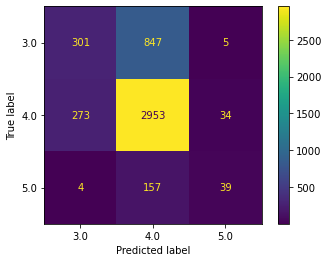

              precision    recall  f1-score   support

         3.0       0.52      0.26      0.35      1153
         4.0       0.75      0.91      0.82      3260
         5.0       0.50      0.20      0.28       200

    accuracy                           0.71      4613
   macro avg       0.59      0.45      0.48      4613
weighted avg       0.68      0.71      0.68      4613



array([4., 4., 4., ..., 4., 4., 4.])

In [282]:
from sklearn.linear_model import LogisticRegression
meta_classifier_lr = LogisticRegression()
meta_classifier_lr.fit(X_meta, y_train)
evaluate(meta_classifier_lr, X_meta_val, y_val, print_confusion_matrix=True, print_classification_report=True)

In [570]:
# np array needs to use index
GAUSSIAN_FEATURES_ID = [1,3]
CATEGORICAL_FEATURES_ID = [0,2]
MULTINOMIAL_FEATURES_ID = list(range(4,X_train.shape[1]))

FEATURE_SETS = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]
FEATURE_SETS


[['PublishYear', 'pagesNumber'],
 ['Authors', 'Publisher'],
 ['survival_guide',
  'everything_need',
  'need_know',
  'civil_right',
  'story_behind',
  'every_day',
  'chapter_book',
  'eighteenth_century',
  'new_world',
  'short_trip',
  'van_gogh',
  'fairy_tale',
  'anglo_saxon',
  'lesbian_gay',
  'early_modern',
  'modern_england',
  'book_modern',
  'stony_man',
  'spider_man',
  'new_selected',
  'selected_poem',
  'volume_one',
  'true_story',
  'new_testament',
  'bible_study',
  'one_man',
  'jigsaw_jones',
  'middle_age',
  'captain_underpants',
  'world_war',
  'reader_level',
  'oxford_dictionary',
  'ancient_world',
  'star_trek',
  'able_team',
  'travel_writing',
  'life_death',
  'world_history',
  'appalachian_trail',
  'seventeenth_century',
  'life_lesson',
  'great_book',
  'complete_book',
  'robert_lee',
  'rise_fall',
  'second_chance',
  'nancy_drew',
  'best_friend',
  'guide_understanding',
  'revised_updated',
  'practical_guide',
  'art_craft',
  'jane_au

In [571]:
from sklearn.metrics import accuracy_score


class StackingNB():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = FEATURE_SETS

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers = input for meta-classifier
        self.metaclassifier.fit(X_meta, y) #output of the base classifiers is the input for the meta classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({'GaussianNB_pred' : y_hats[0],
                               'CategoricalNB_pred' : y_hats[1],
                               'MultinomialNB_pred' : y_hats[2]})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X):
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)

In [591]:
def replace_negative(arr, columns, encoder):
    df = pd.DataFrame(arr, columns=columns)
    print(df)
    for i in range(len(CATEGORICAL_FEATURES_ID)): 
        df[CATEGORICAL_FEATURES[i]] = df[CATEGORICAL_FEATURES[i]].replace(-1, encoder.categories_[i].size)
    return df

In [592]:
from sklearn.preprocessing import FunctionTransformer

categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_preprocessor.fit(train_df[CATEGORICAL_FEATURES])

preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, CATEGORICAL_FEATURES_ID)],
    remainder='passthrough', sparse_threshold=0)

df_converter = FunctionTransformer(replace_negative, kw_args={'columns': X_train.columns, 'encoder':categorical_preprocessor})

# meta_classifier = CategoricalNB
base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha = 1),
                    MultinomialNB()]
meta_classifier = CategoricalNB()

snb = Pipeline([
    ("preprocessor", preprocessor), 
    ("converter", df_converter),
    ("classifier", StackingNB(base_classifiers, meta_classifier))])  # uses Stochastic Average Gradient descent solver
snb


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [0, 2])])),
                ('converter',
                 FunctionTransformer(func=<function replace_negative at 0x1e892b8b0>,
                                     kw_args={'columns': Index(['Authors', 'PublishYear', 'Publisher', 'page...
       'everything_need', 'need_know', 'civil_right', 'story_behind',
       'every_day',
       ...
       'book first', 'three decade', 'wall street', 'little girl',
       'comic book', 'million copy', 'help student', 'old testament',
       'orson scott', 'scott card'],
      dtype='object', length=604),
                                              'encoder': OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                        unknown_value=-1)})),
                ('classifier', <__main__.StackingNB object at 0x1e8930520>)])

In [593]:
snb.fit(X_train, y_train)
evaluate(snb, X_val, y_val)

       Authors  PublishYear  Publisher  pagesNumber  survival_guide  \
0       3351.0       2163.0       13.0          0.0             0.0   
1      12783.0       2183.0       13.0          0.0             0.0   
2       4710.0       1968.0       13.0          1.0             0.0   
3      10773.0       2299.0       13.0          0.0             0.0   
4       5736.0       1184.0       13.0          2.0             0.0   
...        ...          ...        ...          ...             ...   
18445   2939.0       2984.0       13.0          3.0             0.0   
18446   8150.0       2982.0       10.0          0.0             0.0   
18447   8925.0       1447.0       13.0          1.0             0.0   
18448   3194.0       1962.0       13.0          2.0             0.0   
18449   5528.0       2755.0       12.0          2.0             0.0   

       everything_need  need_know  civil_right  story_behind  every_day  ...  \
0                  0.0        0.0          0.0           0.0       

IndexError: index 13546 is out of bounds for axis 1 with size 13546

Evaluate on training set:

StackingNB prediction took 15.361557960510254 seconds
    test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0            0.320197           0.791098           0.127660       0.670639
1            0.357647           0.782293           0.093023       0.668472
2            0.377171           0.811159           0.177778       0.700975
3            0.384075           0.794182           0.090909       0.682557
4            0.372960           0.787172           0.133333       0.674973
5            0.320802           0.792291           0.217391       0.676056
6            0.392344           0.811552           0.139535       0.700975
7            0.345324           0.790159           0.255319       0.676056
8            0.418605           0.805839           0.173913       0.699892
9            0.364045           0.781457           0.095238       0.665222
10           0.387850           0.795918           0.136364       0.685466
11           0.3576

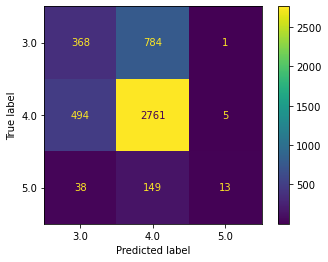

              precision    recall  f1-score   support

         3.0       0.41      0.32      0.36      1153
         4.0       0.75      0.85      0.79      3260
         5.0       0.68      0.07      0.12       200

    accuracy                           0.68      4613
   macro avg       0.61      0.41      0.42      4613
weighted avg       0.66      0.68      0.66      4613



In [334]:
# meta classifier = LogisticRegression
meta_classifier_lr = LogisticRegression()
snb_lr = StackingNB(base_classifiers, meta_classifier_lr)
snb_lr.fit(X_train, y_train)
final_pred = validate_and_test(snb_lr, X_train, y_train, X_val, y_val)
# yields similar result

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", 
     RandomForestClassifier(random_state=30027, max_samples=0.5, max_features='log2', criterion='entropy', n_estimators=5))])

In [ ]:
param_grid = {
    'classifier__n_estimators': (5, 10, 20, 50, 100),
    'classifier__max_samples': (0.3, 0.5, 0.7), 
    'classifier__max_features': (0.3, 0.5, 0.7)}
cv_results = tune_hyperparameter(rf, param_grid, X_train, y_train, cv=3)
cv_results

In [ ]:
cv_results.iloc[35,0]
# but max_features='log2' works better than 0.7

In [ ]:
rf.fit(X_train, y_train)
evaluate(rf, X_val, y_val)